# CSE351 HOMEWORK 2
## SAHIL SARNA
## 109918198

Import Libraries

In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn import metrics
import statsmodels.api as sm
a4_dims = (11.7, 8.27)

Import Data


In [273]:
weatherData = pd.read_csv("/Users/sahilsarna/Documents/CSE351/HW2/weather_data.csv")
energyData = pd.read_csv("/Users/sahilsarna/Documents/CSE351/HW2/energy_data.csv", parse_dates=['Date & Time'])

Check Data

In [274]:
weatherData.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [275]:
energyData.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


### TASK 1

###### Change Unix time to Datetime in Weather Dataset

In [276]:
timeData = weatherData['time']

Changing Time

In [277]:
for x in range(timeData.size):
    newTime = datetime.utcfromtimestamp(timeData[x]).strftime('%Y-%m-%d %H:%M:%S')
    timeData[x] = newTime

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Check the result after changing values

In [278]:
timeData.head()

0    2014-01-01 00:00:00
1    2014-01-01 01:00:00
2    2014-01-01 02:00:00
3    2014-01-01 03:00:00
4    2014-01-01 04:00:00
Name: time, dtype: object

Putting the time data back in the Weather Dataset

In [279]:
weatherData['time'] = timeData

In [280]:
weatherData.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0


###### Collapsing Energy Data to get Per Day values by taking the <b>sum</b> for all values on each day

In [281]:
energyData.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [282]:
collapsedEnergyData = energyData.set_index('Date & Time').groupby(pd.Grouper(freq='d')).sum().dropna(how='all')

Collapsed Energy Data that gives Energy Usage per day

In [283]:
collapsedEnergyData

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,25.558434,0,25.558434,0.027648,6.628469,0.663398,0.005676,0.489726,0.182251,0.354491,1.059051,0.003269,0.346756,4.567906,0.224794,1.517176,3.820418
2014-01-03,61.066203,0,61.066203,0.045582,10.429788,0.539824,1.140676,0.409804,0.178256,0.359359,0.309177,34.948484,0.351175,4.767804,0.195952,1.534685,3.588311
2014-01-04,20.099577,0,20.099577,0.017047,4.021342,0.535128,0.004272,0.278514,0.182690,0.284474,0.217449,0.002434,0.343668,3.471117,0.211874,0.808600,4.109569
2014-01-05,16.245747,0,16.245747,0.008735,1.887036,0.495392,0.004844,0.260665,0.185596,0.308522,0.303430,0.001639,0.337773,3.629159,0.235630,0.901771,3.608974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,35.046127,0,35.046127,0.029014,4.306682,0.475110,0.019649,0.825872,0.112661,0.255620,5.422751,0.005953,0.015400,0.473471,0.668127,0.642506,3.839653
2014-12-28,37.695824,0,37.695824,0.044794,4.640888,0.456018,0.035832,0.874563,0.115673,0.257369,11.602281,0.008270,0.018872,0.473571,0.657405,0.311556,3.510436
2014-12-29,28.675929,0,28.675929,0.037950,6.143640,0.463515,0.020115,0.552812,0.112204,0.274396,5.951963,0.005461,0.015199,0.493595,0.670818,0.279923,3.702587


###### Collapsing Weather Data to get Per Day values by taking the <b>mean</b> of all the values on each day

In [284]:
weatherData['time'] = pd.to_datetime(weatherData['time'], errors = 'coerce')

In [285]:
weatherData = weatherData.resample('d', on='time').mean().dropna(how='all')

In [286]:
weatherData.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417


##### Merging the Datasets

In [287]:
mergedData = weatherData

In [288]:
mergedData['use [kW]'] = collapsedEnergyData['use [kW]']

In [289]:
mergedData.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
time,,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000,65.013592
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583,25.558434
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000,61.066203
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,20.099577
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417,16.245747


### TASK 2

Checking Variable Correlations

In [290]:
mergedData.corr()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
temperature,1.000000,0.322137,0.104422,-0.205136,-0.226581,0.053968,-0.108984,0.116522,0.966929,0.106991,0.190302
humidity,0.322137,1.000000,-0.662128,-0.206905,-0.307849,0.608071,-0.421354,0.470280,0.549459,0.581198,0.008512
visibility,0.104422,-0.662128,1.000000,0.214076,0.070652,-0.591159,0.298258,-0.530633,-0.070033,-0.654113,0.084559
pressure,-0.205136,-0.206905,0.214076,1.000000,-0.361599,-0.241922,-0.291300,-0.252463,-0.237483,-0.298298,-0.057175
windSpeed,-0.226581,-0.307849,0.070652,-0.361599,1.000000,0.111268,0.277942,0.127482,-0.275908,0.105010,-0.044820
cloudCover,0.053968,0.608071,-0.591159,-0.241922,0.111268,1.000000,-0.358218,0.542465,0.203634,0.661039,-0.063722
windBearing,-0.108984,-0.421354,0.298258,-0.291300,0.277942,-0.358218,1.000000,-0.280751,-0.205763,-0.312450,0.060091
precipIntensity,0.116522,0.470280,-0.530633,-0.252463,0.127482,0.542465,-0.280751,1.000000,0.223141,0.895111,0.038111
dewPoint,0.966929,0.549459,-0.070033,-0.237483,-0.275908,0.203634,-0.205763,0.223141,1.000000,0.242411,0.176760
precipProbability,0.106991,0.581198,-0.654113,-0.298298,0.105010,0.661039,-0.312450,0.895111,0.242411,1.000000,0.011182


###### Splitting Data Sets in Training and Testing

Since we have to predict December values, we'll take the December records as the testing data and all the other months as training data. 

In [291]:
trainingData = mergedData['2014-01-01':'2014-11-30'] # Gets all months except December
testingData = mergedData['2014-12-01':'2014-12-31'] # Gets December Values

Saving the original values of the energy usage in the month of December

In [292]:
testingDataOriginalEnergy = testingData['use [kW]']

Dropping the energy usage values in the month of December

In [293]:
testingData = testingData.drop('use [kW]', axis=1)

### TASK 3

###### Linear Regression

Putting all the Features in 'x_train' and Target in 'y_train'

In [294]:
y_train = trainingData.pop('use [kW]')
x_train = trainingData

Adding a constant

In [295]:
x_train_lm = sm.add_constant(x_train)

<b> Lets find relevant features for our model. </b>

Creating the Linear Regression Model

In [296]:
linearModel_1 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_1.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.827
Date:                Wed, 19 May 2021   Prob (F-statistic):            0.00223
Time:                        00:01:37   Log-Likelihood:                -1358.1
No. Observations:                 334   AIC:                             2738.
Df Residuals:                     323   BIC:                             2780.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               224.0132    154.86

<b> P-Value of 'precipProbability' is pretty high, so we'll drop this feature from our model. </b>

In [297]:
updatedTrainingData = x_train.drop('precipProbability', 1,)

Adding a constant

In [298]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping feature

In [299]:
linearModel_2 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_2.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3.149
Date:                Wed, 19 May 2021   Prob (F-statistic):            0.00117
Time:                        00:01:37   Log-Likelihood:                -1358.1
No. Observations:                 334   AIC:                             2736.
Df Residuals:                     324   BIC:                             2774.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             225.4273    154.176     

<b> P-value of 'cloudCover' is pretty high so we'll drop this feature from our model. </b>

In [300]:
updatedTrainingData = updatedTrainingData.drop('cloudCover', 1,)

Adding a constant

In [301]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping features

In [302]:
linearModel_3 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_3.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.552
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000581
Time:                        00:01:37   Log-Likelihood:                -1358.1
No. Observations:                 334   AIC:                             2734.
Df Residuals:                     325   BIC:                             2768.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             224.5798    153.710     

<b> P-Value of 'pressure' is pretty high, so we'll drop this feature from our model. </b>

In [303]:
updatedTrainingData = updatedTrainingData.drop('pressure', 1,)

Adding a constant

In [304]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping features

In [305]:
linearModel_4 = sm.OLS(y_train, x_train_lm).fit()
print(linearModel_4.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.040
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000291
Time:                        00:01:37   Log-Likelihood:                -1358.2
No. Observations:                 334   AIC:                             2732.
Df Residuals:                     326   BIC:                             2763.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             158.4350     49.448     

<b> P-Value of 'visibility' is pretty high, so we'll drop this feature from our model. </b>

In [306]:
updatedTrainingData = updatedTrainingData.drop('visibility', 1,)

Adding a constant

In [307]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping features

In [308]:
linearModel_5 = sm.OLS(y_train, x_train_lm).fit()
print(linearModel_5.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.649
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000149
Time:                        00:01:37   Log-Likelihood:                -1358.4
No. Observations:                 334   AIC:                             2731.
Df Residuals:                     327   BIC:                             2757.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             136.5697     36.515     

<b> As we've reached a point where the maximum p-value is 0.053 amongst all the features, let's test how our model works right now. </b>

Residual Analysis of the Training Data

We have to check if the error terms are normally distributed (which is one of the major assumptions of linear regression)

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

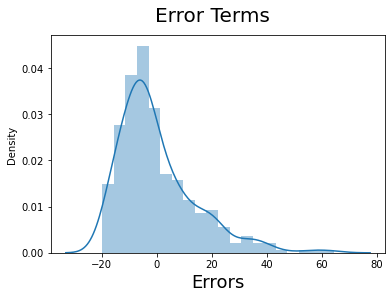

In [309]:
y_train_price = linearModel_5.predict(x_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

As we can see, the error terms are quite similar to a normal distribution. Therefore, we can go ahead and make some predictions using the model in the test dataset.

In [310]:
testingDataCheck = sm.add_constant(testingData)

In [311]:
testingDataCheck = testingDataCheck.drop(["precipProbability", "visibility", "pressure", "cloudCover"], axis=1)

Predicting the Energy Usage for Test Data

In [312]:
energy_prediction_1 = linearModel_5.predict(testingDataCheck)

Checking the $r^2$ for the Model

In [313]:
r2_score(y_true = testingDataOriginalEnergy, y_pred = energy_prediction_1)

0.014616829939679277

$r^2$ of 0.0146 seems pretty low, let's see if we can improve our model by dropping more features.

Mean Absolute Error

In [314]:
print("MAE: ", metrics.mean_absolute_error(testingDataOriginalEnergy, energy_prediction_1))

MAE:  7.650453837665506


Mean Squared Error

In [315]:
print("MSE: ", metrics.mean_squared_error(testingDataOriginalEnergy, energy_prediction_1))

MSE:  117.56480510290437


Root Mean Squared Error

In [316]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(testingDataOriginalEnergy, energy_prediction_1)))

RMSE:  10.842730518780977


<b> Due to high RMSE, we'll continue feature reduction! </b>

<b> P-Value of 'windBearing' is high, so we'll drop this feature from our model. </b>

In [317]:
updatedTrainingData = updatedTrainingData.drop('windBearing', 1,)

Adding a constant

In [318]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping features

In [319]:
linearModel_6 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_6.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.786
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000309
Time:                        00:01:38   Log-Likelihood:                -1360.3
No. Observations:                 334   AIC:                             2733.
Df Residuals:                     328   BIC:                             2755.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             141.6702     36.573     

<b> P-Value of 'windSpeed' is high, so we'll drop this feature from our model. </b>

In [320]:
updatedTrainingData = updatedTrainingData.drop('windSpeed', 1,)

Adding a constant

In [321]:
x_train_lm = sm.add_constant(updatedTrainingData)

In [322]:
linearModel_7 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_7.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.368
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000337
Time:                        00:01:38   Log-Likelihood:                -1361.5
No. Observations:                 334   AIC:                             2733.
Df Residuals:                     329   BIC:                             2752.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             124.9592     34.997     

<b> P-Value of 'precipIntensity' is  high, so we'll drop this feature from our model. </b>

In [323]:
updatedTrainingData = updatedTrainingData.drop('precipIntensity', 1,)

Adding a constant

In [324]:
x_train_lm = sm.add_constant(updatedTrainingData)

Creating an updated Linear Regression Model after dropping features

In [325]:
linearModel_8 = sm.OLS(y_train, x_train_lm).fit()

print(linearModel_8.summary())

                            OLS Regression Results                            
Dep. Variable:               use [kW]   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.621
Date:                Wed, 19 May 2021   Prob (F-statistic):           0.000235
Time:                        00:01:38   Log-Likelihood:                -1362.3
No. Observations:                 334   AIC:                             2733.
Df Residuals:                     330   BIC:                             2748.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         117.6498     34.539      3.406      

<b> We've reached a point where the maximum p-value is 0.014 amongst all the features, let's test how our model works right now. </b>

Residual Analysis of the Training Data

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

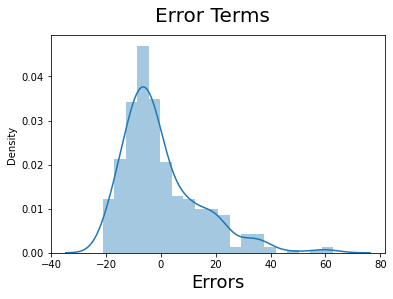

In [326]:
y_train_price = linearModel_8.predict(x_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

As we can see, the error terms are quite similar to a normal distribution. Therefore, we can go ahead and make some predictions using the model in the test dataset.

In [327]:
testingDataCheck = sm.add_constant(testingData)

In [328]:
testingDataCheck = testingDataCheck.drop(["precipProbability", "precipIntensity", "windSpeed", "windBearing", "visibility", "pressure", "cloudCover"], axis=1)

Predicting the Energy Usage for Test Data

In [329]:
energy_prediction_2 = linearModel_8.predict(testingDataCheck)

Checking the $r^2$ for the Model

In [330]:
r2_score(y_true = testingDataOriginalEnergy, y_pred = energy_prediction_2)

0.1647190955972433

$r^2$ of 0.1647 means that our current model is 11 times better than the previous model that we used to predict. 

#### Model Performance 

<b> $r^2$ </b>

$r^2$ = 0.1647 is good as it is between 0 and 1. 
This means that there is only 16% less variation around the line than the mean. 

<b> Analysis of the Training Data </b>

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

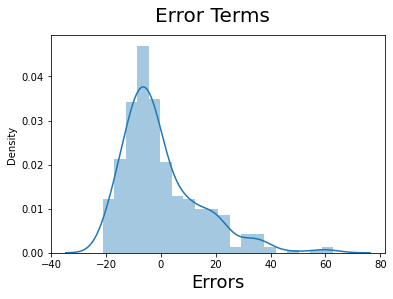

In [331]:
y_train_price = linearModel_8.predict(x_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Plotting the distribution of errors helps a lot in understanding about the outliers and how the error value is spread. The more the distribution is "Right-Skewed", the better is the model performing. This means most of the points have a low error and there are very few points having high error value which are not significant. 

Mean Absolute Error

In [332]:
print("MAE: ", metrics.mean_absolute_error(testingDataOriginalEnergy, energy_prediction_2))

MAE:  7.357809235769315


Mean Squared Error

In [333]:
print("MSE: ", metrics.mean_squared_error(testingDataOriginalEnergy, energy_prediction_2))

MSE:  99.65629586131094


Root Mean Squared Error

In [334]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(testingDataOriginalEnergy, energy_prediction_2)))

RMSE:  9.982800001067384


<b> With an RMSE of 9.9 we can say that this model works pretty well for the given dataset. </b>

Saving the Predicted Values to CSV File

In [335]:
file = pd.DataFrame(energy_prediction_2)

In [336]:
file.rename_axis('date', inplace=True)

In [337]:
file.columns = ["Predicted Value"]
file

,Predicted Value
date,
2014-12-01,32.785025
2014-12-02,32.895366
2014-12-03,25.042986
2014-12-04,32.717275
2014-12-05,28.737435
2014-12-06,24.553853
2014-12-07,29.573629
2014-12-08,30.552145
2014-12-09,25.599459


Writing the Predicted Values to CSV File.

In [338]:
file.to_csv(r"/Users/sahilsarna/Documents/CSE351/HW2/CSE351_HW2_SARNA_SAHIL_109918198_LINEAR_REGRESSION.csv", index=True)

--------

### TASK 4

### Logistic Regression

In [339]:
weatherData.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
time,,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000,65.013592
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583,25.558434
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000,61.066203
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000,20.099577
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417,16.245747


In [340]:
weatherData = weatherData.drop("use [kW]", axis=1)

In [341]:
weatherData.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417


In [342]:
weatherData['temperature']

time
2014-01-01    20.110833
2014-01-02    16.382500
2014-01-03     6.256667
2014-01-04     2.711667
2014-01-05    17.654167
                ...    
2014-12-27    35.487083
2014-12-28    41.892917
2014-12-29    34.728333
2014-12-30    24.846667
2014-12-31    19.522917
Freq: D, Name: temperature, Length: 365, dtype: float64

Changing the values of temperature to 1 for any values equal to and above 35 and to 0 for any values below 35. 

In [343]:
tempType = []
for temp in weatherData['temperature']:
    if temp >= 35:
        tempType.append(1)
    else:
        tempType.append(0)
tempType
weatherData['temperature'] = tempType

In [344]:
weatherData.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-01-01,0,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,0,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,0,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,0,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,0,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417


Splitting The Training and Testing Datasets

In [345]:
trainingData = weatherData['2014-01-01':'2014-11-30'] # Gets all months except December
testingData = weatherData['2014-12-01':'2014-12-31'] # Gets December Values

In [346]:
trainingData['temperature'].value_counts()

1    254
0     80
Name: temperature, dtype: int64

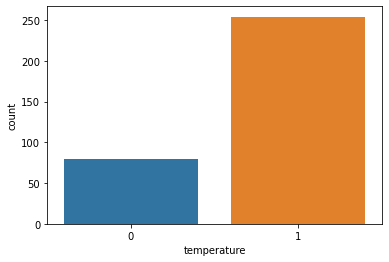

In [347]:
sns.countplot(x='temperature',data=trainingData)
plt.show()

In [348]:
highPercentage = 254*100/334
print("Percentage of High Temperature: ", highPercentage)
lowPercentage = 80*100/334
print("Percentage of Low Temperature: ", lowPercentage)

Percentage of High Temperature:  76.04790419161677
Percentage of Low Temperature:  23.952095808383234


Our classes are imbalanced and are of the ratio of High Temperature and Low Temperature is 76:24. Therefore we need to balance them before going forward. 

Separating Majority and Minority

In [349]:
trainingDataMajority = trainingData[trainingData.temperature==1]
trainingDataMinority = trainingData[trainingData.temperature==0]

Adding Records for Minority Class 

In [350]:
trainingDataMinorityUpSampled = resample(trainingDataMinority,
                                        replace=True,
                                        n_samples=254,
                                        random_state=123)

In [351]:
trainingDataMinorityUpSampled.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-03-25,0,0.502500,9.980417,1019.227917,5.948750,0.093750,225.791667,0.0,7.049167,0.0
2014-01-24,0,0.511250,9.900833,1023.582917,9.317083,0.004167,282.916667,0.0,-5.525417,0.0
2014-03-10,0,0.548750,9.705833,1009.652083,4.403333,0.286667,219.250000,0.0,17.985833,0.0
2014-02-28,0,0.414583,9.475000,1021.176250,10.675417,0.034583,294.125000,0.0,-7.362083,0.0
2014-11-19,0,0.415000,9.987500,1017.829583,8.675417,0.010417,236.916667,0.0,4.348333,0.0


Combining the Majority and Minority Classes

In [352]:
trainingDataUpSampled = pd.concat([trainingDataMajority, trainingDataMinorityUpSampled])

In [353]:
trainingDataUpSampled.head()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,
2014-01-06,1,0.900417,4.062917,1003.460833,7.355833,1.000000,167.458333,0.026258,36.336250,0.460000
2014-01-11,1,0.942083,3.071250,1014.352500,5.228333,0.750000,170.125000,0.014592,38.967500,0.367917
2014-01-12,1,0.713333,9.512917,999.880000,12.111250,0.258182,269.458333,0.007767,35.260833,0.182083
2014-01-13,1,0.656250,9.949583,1016.915833,7.783750,0.046250,215.958333,0.000000,25.650000,0.000000
2014-01-14,1,0.834167,7.272500,1009.468333,6.647917,0.169231,203.791667,0.012871,39.278750,0.280000


Check Value Counts for Temperature

In [354]:
trainingDataUpSampled.temperature.value_counts()

1    254
0    254
Name: temperature, dtype: int64

Now both our classes are balanced. We can go forward with Logistic Regression

Sorting the Up Sampled Data Set According to Date

In [355]:
trainingDataUpSampled = trainingDataUpSampled.sort_index()

Target Value to Train the Model to

In [356]:
trainingDataTemp = trainingDataUpSampled.pop('temperature')

Original Value of Temperature in December Dataset (Test Dataset)

In [357]:
testingDataOriginal = testingData.pop('temperature')

###### Logistic Regression

In [358]:
logRegression = LogisticRegression()

Checking how Logistic Regression works with all the features

In [359]:
logRegression.fit(trainingDataUpSampled, trainingDataTemp)

LogisticRegression()

Coefficients of all the features

In [360]:
logRegression.coef_

array([[-1.26782853,  1.71557383, -0.02980602,  0.493125  ,  0.16293526,
        -0.02222055,  0.01984399,  0.72118295,  0.29117758]])

Getting a ranking of all the features using Recursive Feature Elimination (RSE)

In [361]:
predictors = trainingDataUpSampled
selector = RFE(logRegression, n_features_to_select=1)
selector = selector.fit(predictors, trainingDataTemp)

In [362]:
order = selector.ranking_
order

array([1, 3, 7, 6, 5, 8, 9, 4, 2])

Predicting December Temperature Values

In [363]:
y_pred = logRegression.predict(testingData)

Checking the Accuracy of the Logistic Regression Classifier on Test Set

In [364]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegression.score(testingData, testingDataOriginal)))

Accuracy of logistic regression classifier on test set: 0.68


<b> As the accuracy is only 0.68 we need to remove some features from our model. </b>

From the RFE Feature Rankings we can see that precipIntensity (Rank 9), windBearing (Rank 8), and visibility (Rank 7) are bad for our model, so we'll remove them as a feature.

Dropping 'precipIntensity', 'windBearing' and 'visibility' from the Training and Test Datasets

In [365]:
trainingDataUpSampled = trainingDataUpSampled.drop(columns=['precipIntensity','windBearing','visibility'])
testingData = testingData.drop(columns=['precipIntensity','windBearing','visibility'])

Performing Logistic Regression again on the Updated Training Dataset

In [366]:
logRegression.fit(trainingDataUpSampled, trainingDataTemp)

LogisticRegression()

Coefficients of all the current features

In [367]:
logRegression.coef_

array([[-3.10493766, -0.00930979,  0.20190252, -0.99868793,  0.40906511,
        -0.61663913]])

Using RFE again to get a ranking of the features

In [368]:
predictors = trainingDataUpSampled
selector = RFE(logRegression, n_features_to_select=1)
selector = selector.fit(predictors, trainingDataTemp)

In [369]:
order = selector.ranking_
order

array([1, 6, 5, 2, 3, 4])

In [370]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logRegression.score(testingData, testingDataOriginal)))

Accuracy of logistic regression classifier on test set: 0.87


<b> With an improvement in accuracy to 0.87 we know that the features remaining are excellent for your model. </b>

Predicting the December Temperature Values with our new Updated Model

In [371]:
y_pred = logRegression.predict(testingData)

Constructing a Confusion Matrix based on the Original December Values and Predicted Values

In [372]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testingDataOriginal, y_pred)
print(confusion_matrix)

[[15  3]
 [ 1 12]]


The result is telling us that we have 15+12 (27) correct predictions and 1+3 (4) incorrect predictions.

In [373]:
from sklearn.metrics import classification_report
print(classification_report(testingDataOriginal, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.80      0.92      0.86        13

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



<b> Interpretation: </b> Of the entire test set, we know that 87% of the values are the correct values for the december month. This means that our model is quite accurate.

##### F-1 Score

F-1 Score of the model is 0.87

Saving the Predicted Values to a CSV File

In [374]:
file = pd.DataFrame(y_pred)

In [375]:
file.rename_axis('date', inplace=True)

In [376]:
file.columns = ["Classification (1/0)"]
file

,Classification (1/0)
date,
0,1
1,0
2,1
3,0
4,0
5,1
6,0
7,0
8,0


In [377]:
file.to_csv(r"/Users/sahilsarna/Documents/CSE351/HW2/CSE351_HW2_SARNA_SAHIL_109918198_LOGISTIC_REGRESSION.csv", index=True)

------

### Task 5

In [378]:
energyData.head()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


Creating a Day-Time Time Mask

In [379]:
dayTime_mask = (energyData['Date & Time'].dt.hour >= 6) & (energyData['Date & Time'].dt.hour < 19)

Creating a Night-Time Time Mask

In [380]:
nightTime_mask = (energyData['Date & Time'].dt.hour < 6) | (energyData['Date & Time'].dt.hour >= 19)

Day Data (Starts at 6AM, ends at 7PM)

In [381]:
dayEnergyData = energyData.mask(nightTime_mask, other=np.nan)

Night Data (Starting at 7PM, Ends at 6AM)

In [382]:
nightEnergyData = energyData.mask(dayTime_mask, other=np.nan)

### Plotting Device Trends

Day Time Device

Plotting All the Devices Irrespective of Day and Night

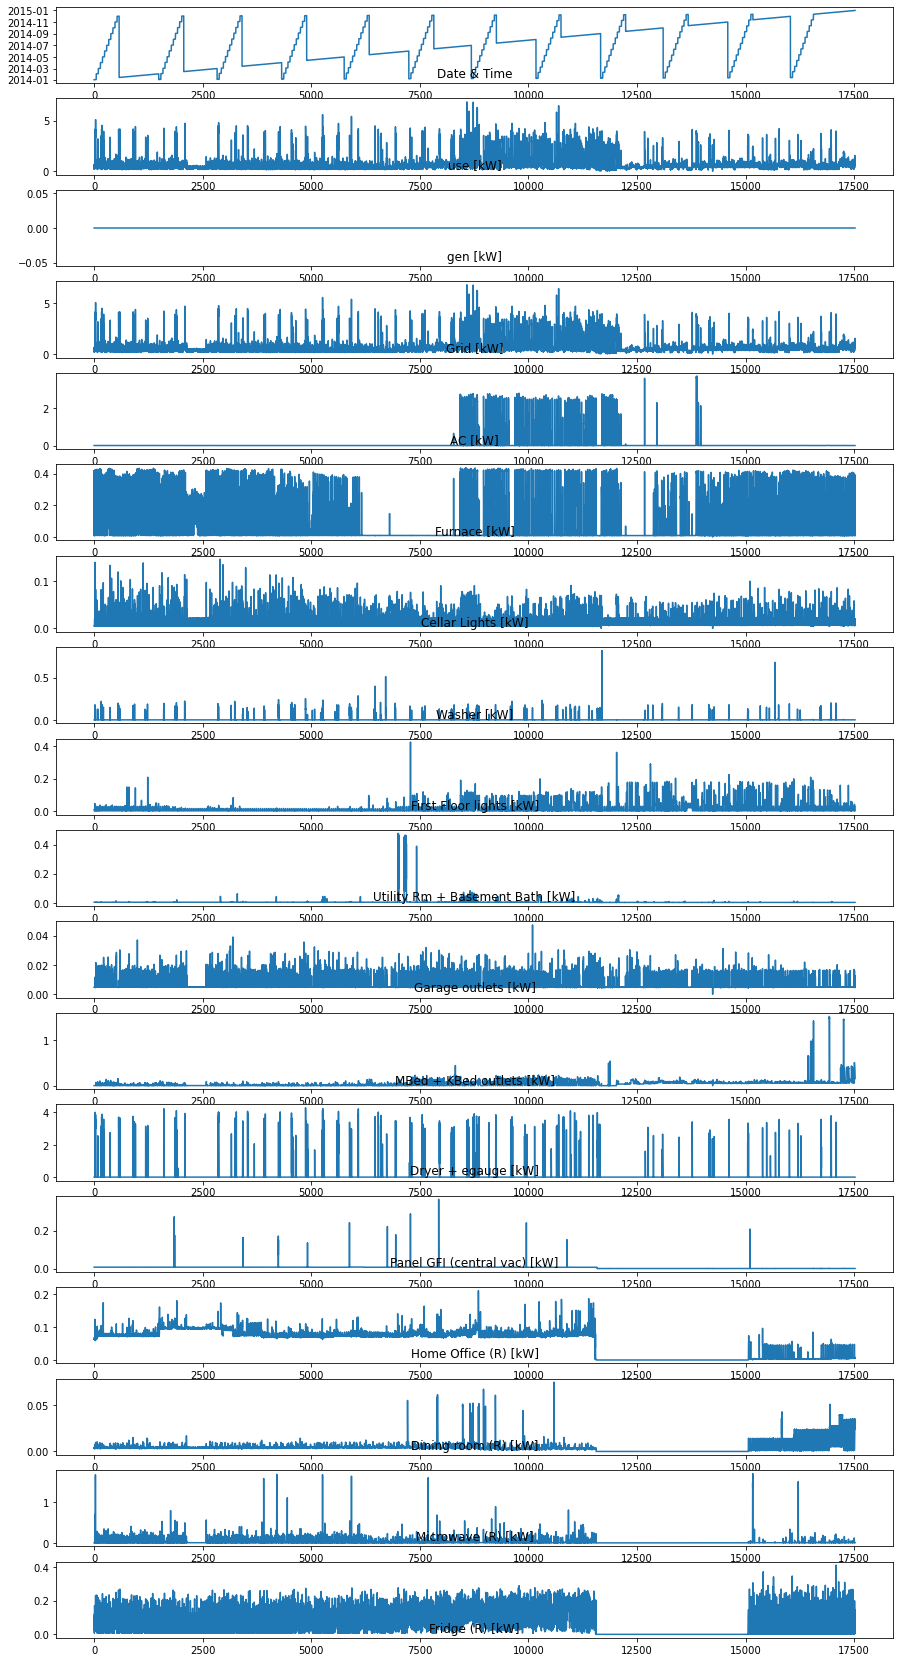

In [383]:
plt.figure(figsize=(15,30))
for i in range(len(energyData.columns)):
    plt.subplot(len(energyData.columns), 1, i+1)
    name = energyData.columns[i]
    plt.plot(energyData[name])
    plt.title(name, y=0)
plt.show()

#### DEVICE 1 : Air Conditioning

Day-Time Usage

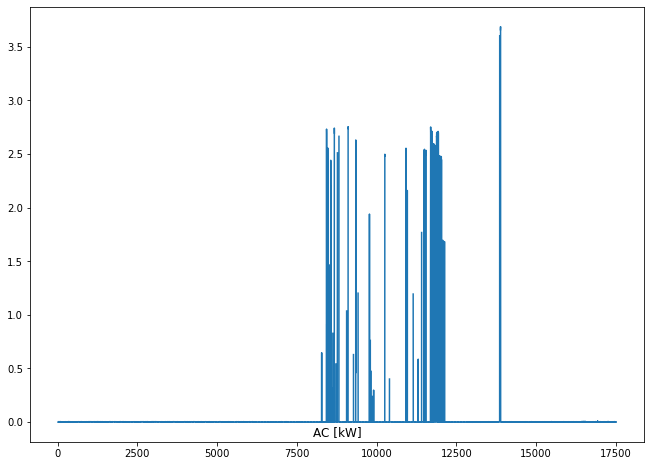

In [384]:
plt.figure(figsize=(11,8))
plt.plot(dayEnergyData['AC [kW]'])
plt.title('AC [kW]', y=0)
plt.show()

Night-Time Usage

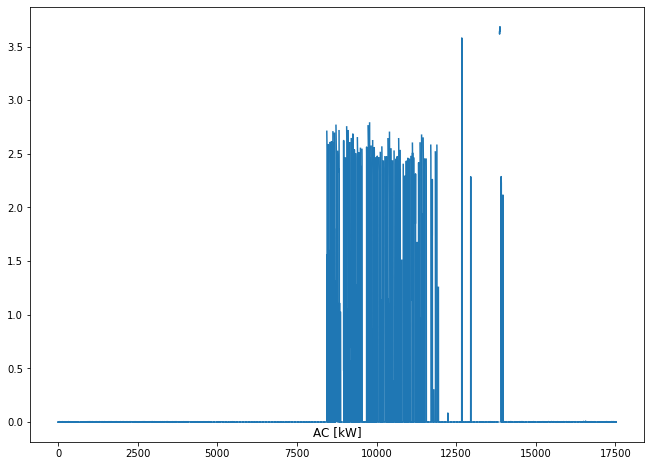

In [385]:
plt.figure(figsize=(11,8))
plt.plot(nightEnergyData['AC [kW]'])
plt.title('AC [kW]', y=0)
plt.show()

##### Findings
- Since our data starts from January, and the only usage of Air-Conditioning is in the middle of the graph, we can easily say that AC is mostly used during the summer time. 
- We can also see that, it is used more at nights compared to during the day. This could be due to:
    - People are not at home during the day so almost all the electronics are off.
    - People are at home at night and hence the usage is more and during the hot summer nights, people might want their AC to be on throughout the night

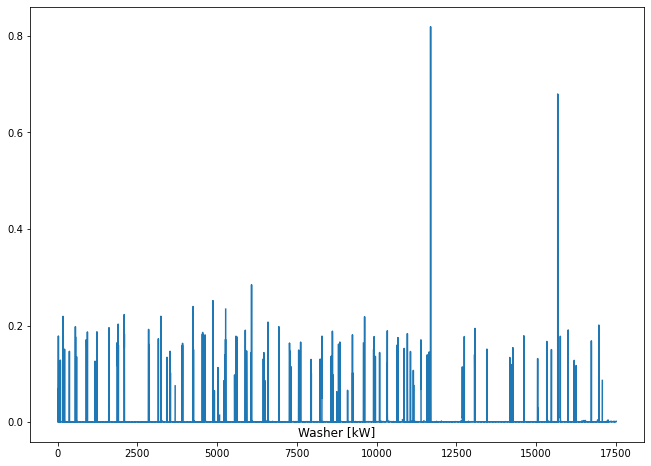

In [386]:
plt.figure(figsize=(11,8))
plt.plot(dayEnergyData['Washer [kW]'])
plt.title('Washer [kW]', y=0)
plt.show()

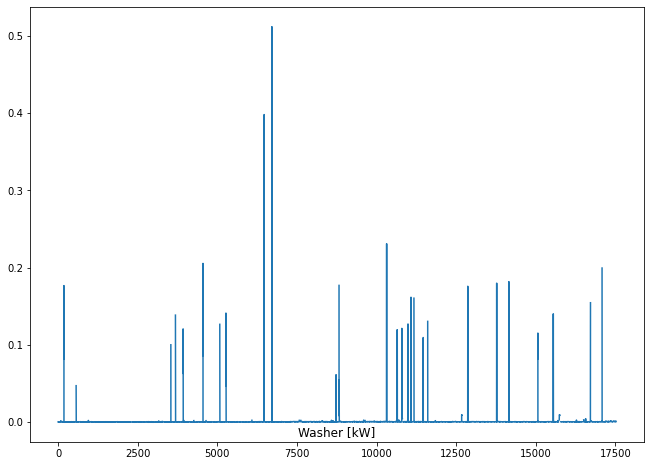

In [387]:
plt.figure(figsize=(11,8))
plt.plot(nightEnergyData['Washer [kW]'])
plt.title('Washer [kW]', y=0)
plt.show()

##### Findings
- Immediately looking at the Night Usage and Day Usage of Washer we can see that people use the washer mostly during the day.
- People tend to use the washer at almost uniform periods of times which makes sense as you don't need to wash clothes every day and you'll only run the washer once or twice every week. So if you usually wash clothes on a Friday, you'll mostly likely wash the next set of clothes around the next Friday only. That's why there are uniform time-intervals. 

---